In [3]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [4]:
data = pandas.read_csv('data/HR_comma_sep.csv')

In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Visualization

### Employees Left

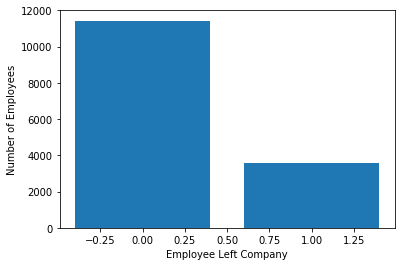

In [23]:
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employee Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [18]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Number of projects

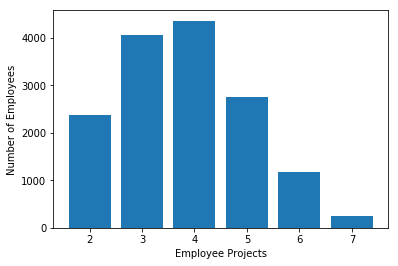

In [25]:
number_project = data.groupby('number_project').count()
plt.bar(number_project.index.values, number_project['satisfaction_level'])
plt.xlabel('Employee Projects')
plt.ylabel('Number of Employees')
plt.show()

### Time Spent in Company

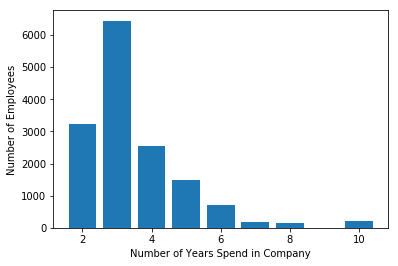

In [26]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

### Subplots using Seaborn

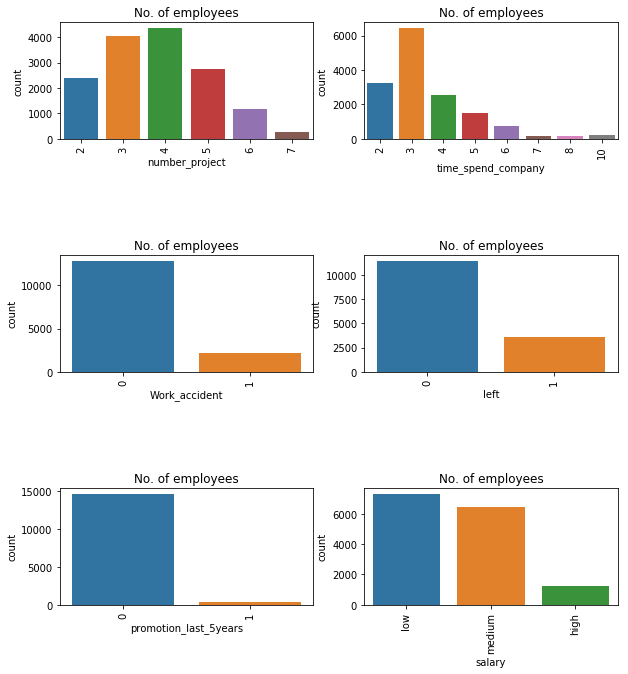

In [45]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary']
fig = plt.subplots(figsize=(10, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data)
    plt.xticks(rotation=90)
    plt.title('No. of employees')

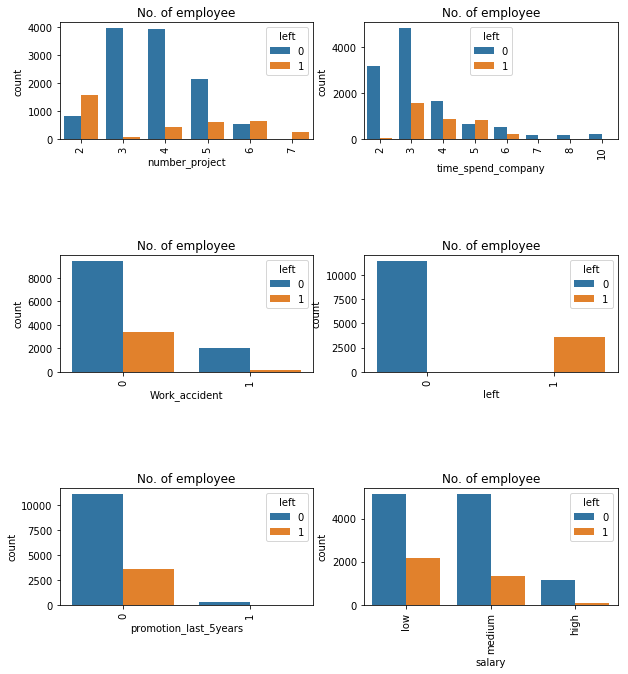

In [46]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Cluster Analysis

In [48]:
from sklearn.cluster import KMeans
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters=3, random_state=0).fit(left_emp)

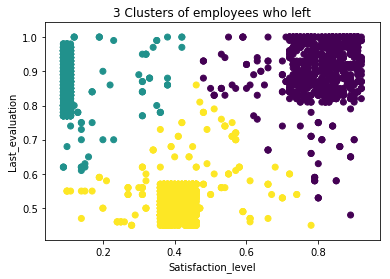

In [50]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'])
plt.xlabel('Satisfaction_level')
plt.ylabel('Last_evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

## Building a Prediction Model

### Pre-Processing Data

In [52]:
# label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['Departments '] = le.fit_transform(data['Departments '])

### Split Train and Test Set

In [54]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Building

In [57]:
# Gradient Boosting Classifier.
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

## Evaluating Model Performance

In [59]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806
